In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df = pd.read_excel('glass.xlsx') ##, encoding='latin-1')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [2]:
df.dropna(inplace=True)
df.shape

(214, 10)

In [3]:
df.drop_duplicates(inplace=True)

In [4]:
# Missing Values
print(df.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [5]:
print(df.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
#Detect Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Extracting rows that are outliers
outliers_df = df[outliers.any(axis=1)]
print(outliers_df)

          RI     Na    Mg    Al     Si     K    Ca    Ba    Fe  Type
5    1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.00  0.26     1
21   1.51966  14.77  3.75  0.29  72.02  0.03  9.00  0.00  0.00     1
32   1.51775  12.85  3.48  1.23  72.97  0.61  8.56  0.09  0.22     1
36   1.51909  13.89  3.53  1.32  71.81  0.51  8.78  0.11  0.00     1
38   1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.00  0.00     1
..       ...    ...   ...   ...    ...   ...   ...   ...   ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.00     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.00     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.00     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.00     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.00     7

[78 rows x 10 columns]


In [ ]:
# Detect outliers

Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['chol'] < lower_bound) | (df['chol'] > upper_bound)]
print("Outliers in 'chol column:")
print(outliers)

In [12]:
#logical_inconsistencies 

logical_inconsistencies = df[(df['Ba'] == 0) & (df['Fe'] != 0)]
print("Logical Inconsistencies:\n", logical_inconsistencies)

Logical Inconsistencies:
           RI     Na    Mg    Al     Si     K     Ca   Ba    Fe  Type
5    1.51596  12.79  3.61  1.62  72.97  0.64   8.07  0.0  0.26     1
9    1.51755  13.00  3.60  1.36  72.99  0.57   8.40  0.0  0.11     1
10   1.51571  12.72  3.46  1.56  73.20  0.67   8.09  0.0  0.24     1
12   1.51589  12.88  3.43  1.40  73.28  0.69   8.05  0.0  0.24     1
13   1.51748  12.86  3.56  1.27  73.21  0.54   8.38  0.0  0.17     1
19   1.51735  13.02  3.54  1.69  72.73  0.54   8.44  0.0  0.07     1
20   1.51750  12.82  3.55  1.49  72.75  0.54   8.52  0.0  0.19     1
30   1.51768  12.65  3.56  1.30  73.08  0.61   8.69  0.0  0.14     1
33   1.51753  12.57  3.47  1.38  73.39  0.60   8.55  0.0  0.06     1
44   1.51786  12.73  3.43  1.19  72.95  0.62   8.76  0.0  0.30     1
46   1.51869  13.19  3.37  1.18  72.72  0.57   8.83  0.0  0.16     1
47   1.52667  13.99  3.70  0.71  71.57  0.02   9.82  0.0  0.10     1
50   1.52320  13.72  3.72  0.51  71.75  0.09  10.06  0.0  0.16     1
51   1.5

In [13]:
df.shape

(213, 10)

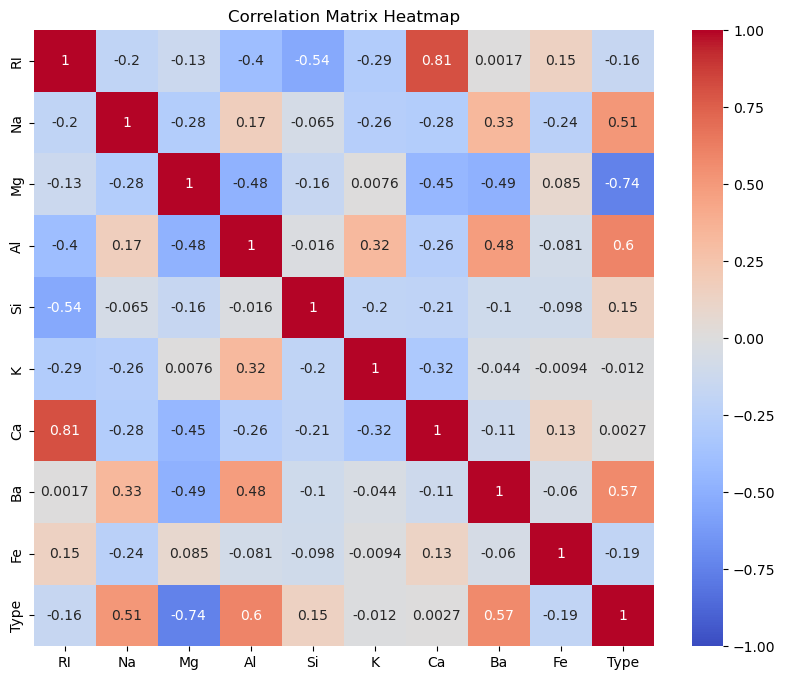

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting correlation matrix as heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

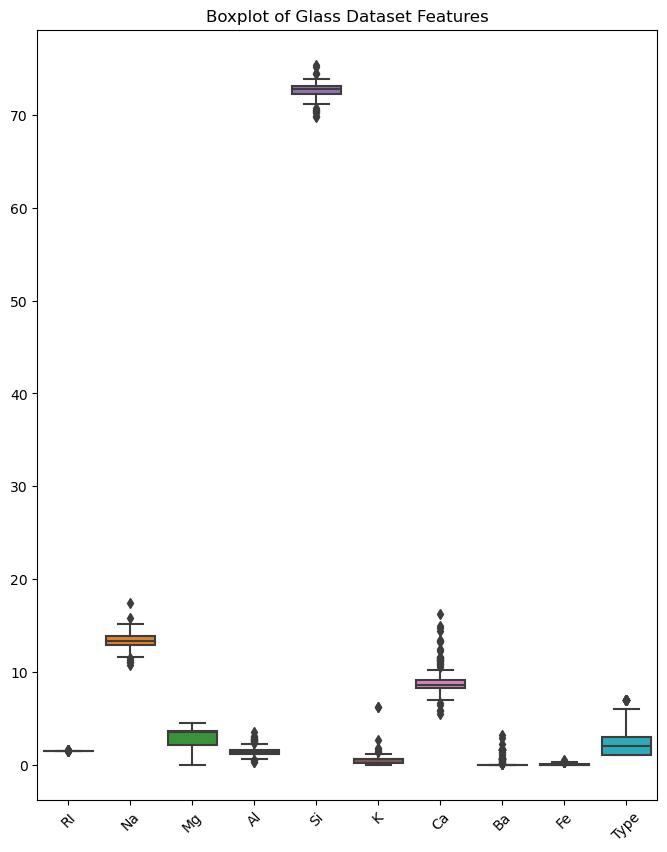

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Glass Dataset Features')
plt.xticks(rotation=45)
plt.show()


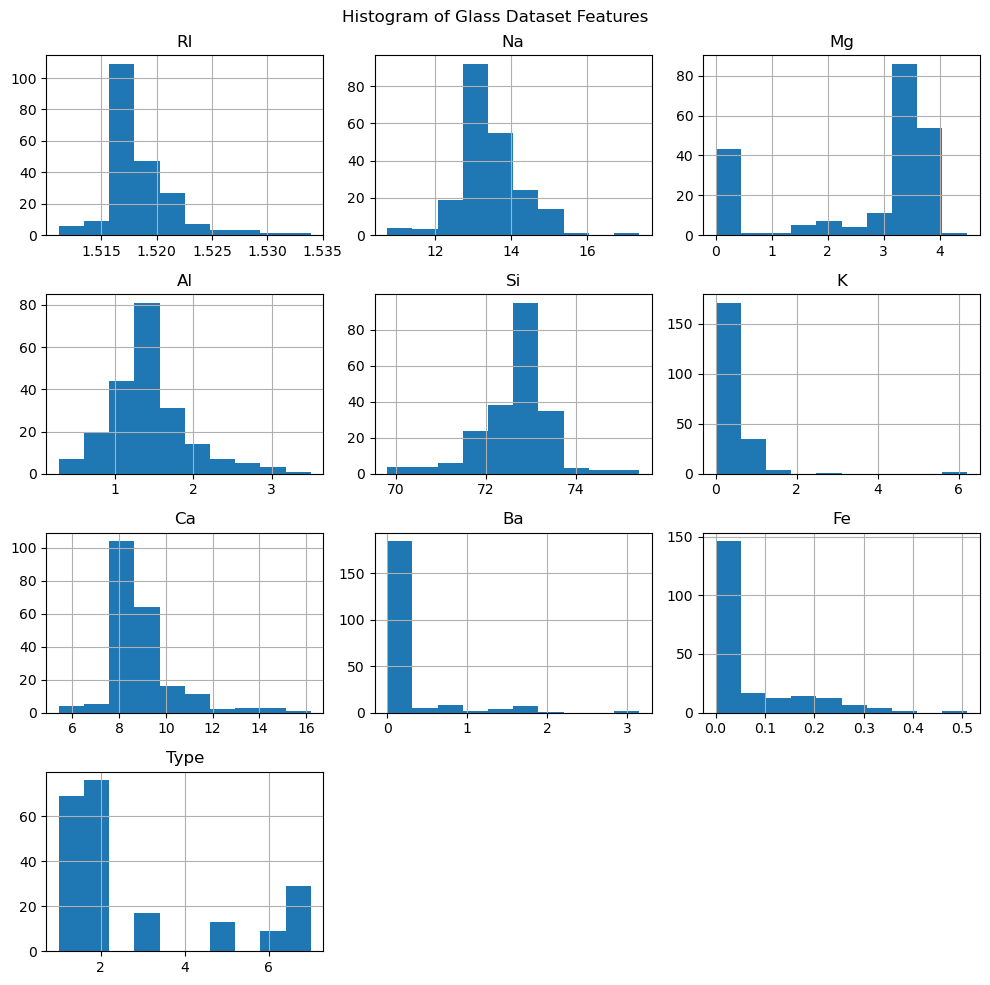

In [20]:
df.hist(bins=10, figsize=(10, 10), layout=(4, 3))
plt.suptitle('Histogram of Glass Dataset Features')
plt.tight_layout()
plt.show()

In [24]:
# numerical features implement with scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical = scaler.fit_transform(df)  # This scales the numerical features


scaled_df = pd.DataFrame(scaled_numerical, columns=df.columns) 
print(scaled_df)

           RI        Na        Mg        Al        Si         K        Ca  \
0    0.879840  0.289558  1.257238 -0.706370 -1.133248 -0.673480 -0.143466   
1   -0.243816  0.596403  0.639311 -0.180863  0.097037 -0.028962 -0.790201   
2   -0.716412  0.154546  0.604596  0.182950  0.433746 -0.167073 -0.825349   
3   -0.227291 -0.238216  0.701798 -0.322346 -0.058368  0.109149 -0.516041   
4   -0.306608 -0.164573  0.653197 -0.423405  0.550299  0.078457 -0.621487   
..        ...       ...       ...       ...       ...       ...       ...   
208 -0.699888  0.903249 -1.860172  2.891336 -0.058368 -0.642789  0.158812   
209 -0.494986  1.860605 -1.860172  1.092483  0.524398 -0.765554 -0.389506   
210  0.760865  1.173272 -1.860172  1.153118  0.990612 -0.765554 -0.361387   
211 -0.607351  1.197820 -1.860172  0.991424  1.236668 -0.765554 -0.333268   
212 -0.409059  1.013713 -1.860172  1.274389  0.912909 -0.765554 -0.234852   

           Ba        Fe      Type  
0   -0.353808 -0.588301 -0.851703  
1  

In [30]:
target=df[['Type']]
target.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [31]:
target.value_counts()

Type
2       76
1       69
7       29
3       17
5       13
6        9
dtype: int64

In [32]:
features= df.drop('Type',axis=1)
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [33]:
features=pd.get_dummies(features,dtype='int')
features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [38]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.8,random_state=42)
df.Mg.unique()

array([4.49, 3.6 , 3.55, 3.69, 3.62, 3.61, 3.58, 3.46, 3.66, 3.43, 3.56,
       3.59, 3.54, 3.67, 3.85, 3.73, 3.75, 3.57, 3.5 , 3.48, 3.52, 3.49,
       3.47, 3.45, 3.53, 3.82, 3.42, 3.39, 3.84, 3.37, 3.7 , 3.77, 3.35,
       3.72, 3.33, 2.87, 2.84, 2.81, 2.71, 3.74, 3.86, 3.81, 3.65, 3.87,
       3.09, 3.44, 3.41, 3.34, 3.25, 2.88, 2.96, 2.85, 2.72, 2.76, 3.15,
       2.9 , 0.  , 3.83, 3.97, 3.89, 3.9 , 3.68, 3.64, 3.76, 2.28, 2.09,
       1.35, 1.01, 3.98, 3.93, 3.8 , 3.63, 3.51, 3.18, 3.4 , 3.36, 3.78,
       2.68, 1.85, 1.88, 1.71, 1.61, 0.33, 2.39, 2.41, 2.24, 2.19, 1.74,
       0.78, 3.2 , 3.26, 2.2 , 1.83, 1.78])

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(170, 9)
(43, 9)
(170, 1)
(43, 1)


In [40]:
x_test.isnull().sum()

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64

In [47]:
# Train the Random Forest model &  libraries for Modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import randint
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [45]:
#Make predictions and evaluate the model
y_pred = model.predict(x_test)

Accuracy: 0.7674418604651163
Confusion Matrix:
[[10  0  0  0  0  0]
 [ 4 10  0  1  0  0]
 [ 0  1  2  0  0  0]
 [ 0  2  0  1  0  0]
 [ 0  1  0  0  2  0]
 [ 0  1  0  0  0  8]]
Classification Report:
              precision    recall  f1-score   support

           1       0.71      1.00      0.83        10
           2       0.67      0.67      0.67        15
           3       1.00      0.67      0.80         3
           5       0.50      0.33      0.40         3
           6       1.00      0.67      0.80         3
           7       1.00      0.89      0.94         9

    accuracy                           0.77        43
   macro avg       0.81      0.70      0.74        43
weighted avg       0.78      0.77      0.76        43



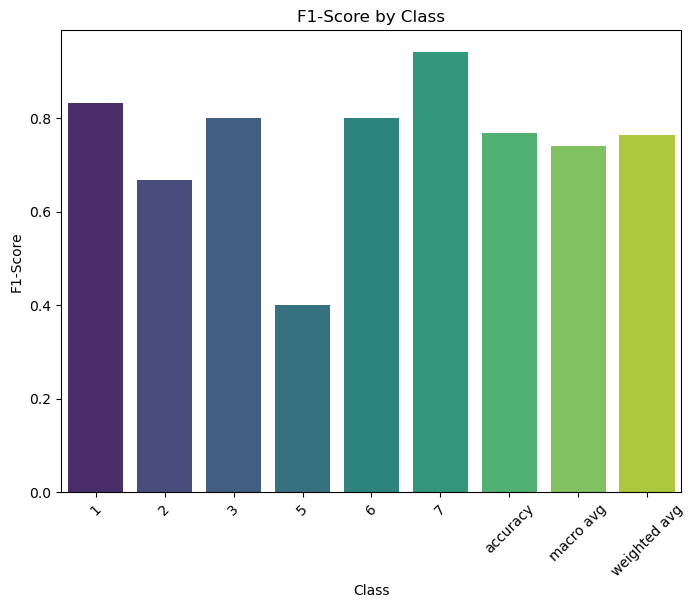

In [58]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
accuracy = accuracy_score(y_test, y_pred)


print("Confusion Matrix:")
print(conf_matrix)

conf_matrix = confusion_matrix(y_test, y_pred)


print("Classification Report:")
print(class_report)

class_report = classification_report(y_test, y_pred, output_dict=True)
df_class_report = pd.DataFrame(class_report).transpose()

plt.figure(figsize=(8, 6))
sns.barplot(x=df_class_report.index, y=df_class_report['f1-score'], palette='viridis')
plt.xlabel('Class')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class')
plt.xticks(rotation=45)
plt.show()



# Bagging and Boosting models

In [59]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

bagging_model.fit(x_train, y_train)
boosting_model.fit(x_train, y_train)

#predictions and evaluate the models
y_pred_bagging = bagging_model.predict(x_test)
y_pred_boosting = boosting_model.predict(x_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)

conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)
conf_matrix_boosting = confusion_matrix(y_test, y_pred_boosting)

class_report_bagging = classification_report(y_test, y_pred_bagging)
class_report_boosting = classification_report(y_test, y_pred_boosting)

print(f"Bagging Accuracy: {accuracy_bagging}")
print("Bagging Confusion Matrix:")
print(conf_matrix_bagging)
print("Bagging Classification Report:")
print(class_report_bagging)

print(f"Boosting Accuracy: {accuracy_boosting}")
print("Boosting Confusion Matrix:")
print(conf_matrix_boosting)
print("Boosting Classification Report:")
print(class_report_boosting)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Accuracy: 0.7906976744186046
Bagging Confusion Matrix:
[[9 0 0 0 0 1]
 [5 9 0 1 0 0]
 [0 0 3 0 0 0]
 [0 0 0 3 0 0]
 [0 1 0 0 2 0]
 [0 1 0 0 0 8]]
Bagging Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.90      0.75        10
           2       0.82      0.60      0.69        15
           3       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      0.67      0.80         3
           7       0.89      0.89      0.89         9

    accuracy                           0.79        43
   macro avg       0.85      0.84      0.83        43
weighted avg       0.81      0.79      0.79        43

Boosting Accuracy: 0.7441860465116279
Boosting Confusion Matrix:
[[ 8  1  0  0  0  1]
 [ 3 11  0  1  0  0]
 [ 0  1  2  0  0  0]
 [ 0  0  0  3  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  1  0  0  8]]
Boosting Classification Report:
              precision    recall  f1-score   su

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

# Plotting the confusion matrices

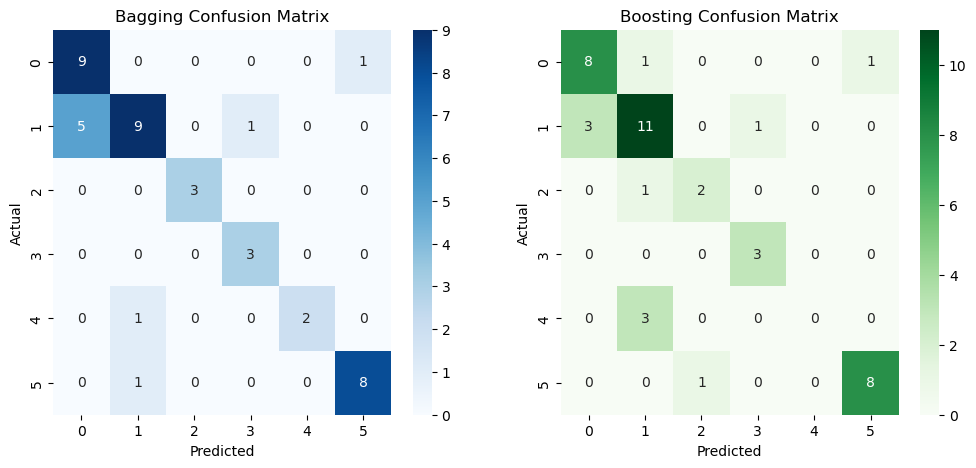

In [60]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_bagging, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Bagging Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

sns.heatmap(conf_matrix_boosting, annot=True, fmt='d', ax=ax[1], cmap='Greens')
ax[1].set_title('Boosting Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.show()

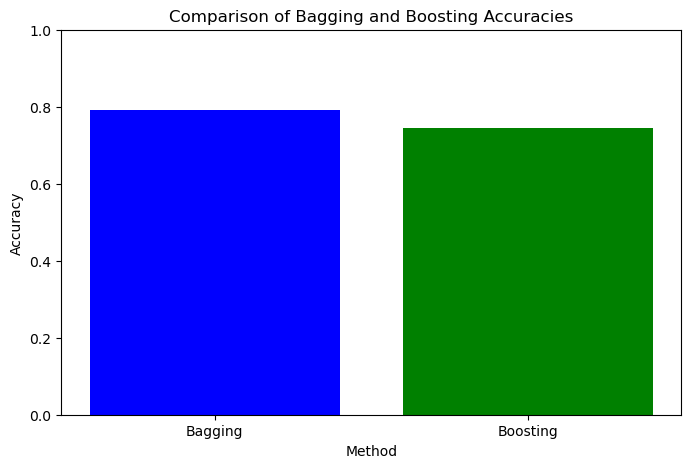

In [61]:

# Plotting the accuracies
methods = ['Bagging', 'Boosting']
accuracies = [accuracy_bagging, accuracy_boosting]

plt.figure(figsize=(8, 5))
plt.bar(methods, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Comparison of Bagging and Boosting Accuracies')
plt.show()

In [ ]:
# bagging and boosting techniques are essential for improving the performance, robustness, and ability of machine learning models like random forests. They address issues of variance,  and overfitting. and compare random forest
 # bagging classifier can help reduce the variance by averaging multiple instances trained on different subsets of data.